In [107]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#pip install -U textblob
import textblob
#pip install -U textblob-de
from textblob_de import TextBlobDE
#pip install seaborn
import seaborn as sns

import nltk

In [108]:
df = pd.read_csv('D:/refugeeks_project/selenium_py/p1_py/kliniks_Gesamt_liste1.csv') #index_col=0
df.head()

,Klinik_Name,Title,Department,Date,GesamtListe,Review
0,HEH Herzogin Elisabeth Hospital,Bewertung,Chirurgie,09.06.2021,star-6,Sehr höfliche und hilfsbereite Mitarbeiter.\n\...
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,Chirurgie,09.06.2021,star-6,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...
2,HEH Herzogin Elisabeth Hospital,Superklinik,Orthopädie,07.06.2021,star-6,Bestens durchorganisiert.gutes Personal geht i...
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,Unfallchirurgie,25.05.2021,star-6,Bin nach einem Autounfall im HEH gewesen und h...
4,HEH Herzogin Elisabeth Hospital,Knie OP,Orthopädie,11.05.2021,star-6,Wurde bereits im Sept. 2020 am Knie operiert. ...


In [109]:
df.loc[(df.GesamtListe == 'star-6'), 'GesamtListe'] = 6
df.loc[(df.GesamtListe == 'star-5'), 'GesamtListe'] = 5
df.loc[(df.GesamtListe == 'star-4'), 'GesamtListe'] = 4
df.loc[(df.GesamtListe == 'star-3'), 'GesamtListe'] = 3
df.loc[(df.GesamtListe == 'star-2'), 'GesamtListe'] = 2
df.loc[(df.GesamtListe == 'star-1'), 'GesamtListe'] = 1
df.loc[(df.GesamtListe == 'star-0'), 'GesamtListe'] = 0

In [110]:
df

,Klinik_Name,Title,Department,Date,GesamtListe,Review
0,HEH Herzogin Elisabeth Hospital,Bewertung,Chirurgie,09.06.2021,6,Sehr höfliche und hilfsbereite Mitarbeiter.\n\...
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,Chirurgie,09.06.2021,6,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...
2,HEH Herzogin Elisabeth Hospital,Superklinik,Orthopädie,07.06.2021,6,Bestens durchorganisiert.gutes Personal geht i...
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,Unfallchirurgie,25.05.2021,6,Bin nach einem Autounfall im HEH gewesen und h...
4,HEH Herzogin Elisabeth Hospital,Knie OP,Orthopädie,11.05.2021,6,Wurde bereits im Sept. 2020 am Knie operiert. ...
...,...,...,...,...,...,...
955,Diana Klinik-Fachklinik für Physikalische Medizin,Sehr zufrieden,Orthopädie,02.11.2018,6,Sehr freundliches und hilfsbereites Personal. ...
956,Diana Klinik-Fachklinik für Physikalische Medizin,Therapieerfolg,Orthopädie,18.07.2018,4,Direkt aus dem Krankenhaus in die Diana-Klinik...
957,Diana Klinik-Fachklinik für Physikalische Medizin,zu wenig einzelgespräche,Psychosomatik,21.06.2018,4,es hätten mehr gespräche statt finden können b...
958,Diana Klinik-Fachklinik für Physikalische Medizin,Empfehlenswerte Klinik,Psychosomatik,18.06.2018,6,Ich war 5 Wochen in der Diana Klinik und habe ...


In [111]:
df['GesamtListe'] = df['GesamtListe'].astype(int)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Klinik_Name  960 non-null    object
 1   Title        959 non-null    object
 2   Department   958 non-null    object
 3   Date         960 non-null    object
 4   GesamtListe  960 non-null    int32 
 5   Review       947 non-null    object
dtypes: int32(1), object(5)
memory usage: 41.4+ KB


In [113]:
Review = df.Review

In [114]:
type(Review)

pandas.core.series.Series

In [115]:
Review = str (Review)
print(Review)

0      Sehr höfliche und hilfsbereite Mitarbeiter.\n\...
1      Kann ich nur weiterempfehlen!! Sehr gutes Pfle...
2      Bestens durchorganisiert.gutes Personal geht i...
3      Bin nach einem Autounfall im HEH gewesen und h...
4      Wurde bereits im Sept. 2020 am Knie operiert. ...
                             ...                        
955    Sehr freundliches und hilfsbereites Personal. ...
956    Direkt aus dem Krankenhaus in die Diana-Klinik...
957    es hätten mehr gespräche statt finden können b...
958    Ich war 5 Wochen in der Diana Klinik und habe ...
959    Sehbehinderte Patienten sollten diese Klinik m...
Name: Review, Length: 960, dtype: object


In [116]:
type(Review)

str

In [117]:
blob = TextBlobDE(Review)

In [118]:
blob.sentences

[Sentence("0      Sehr höfliche und hilfsbereite Mitarbeiter.\n\...
 1      Kann ich nur weiterempfehlen!!"),
 Sentence("Sehr gutes Pfle...
 2      Bestens durchorganisiert.gutes Personal geht i...
 3      Bin nach einem Autounfall im HEH gewesen und h...
 4      Wurde bereits im Sept."),
 Sentence("2020 am Knie operiert."),
 Sentence("...
                              ...                        
 955    Sehr freundliches und hilfsbereites Personal."),
 Sentence("...
 956    Direkt aus dem Krankenhaus in die Diana-Klinik...
 957    es hätten mehr gespräche statt finden können b...
 958    Ich war 5 Wochen in der Diana Klinik und habe ...
 959    Sehbehinderte Patienten sollten diese Klinik m...
 Name: Review, Length: 960, dtype: object")]

In [119]:
blob.tokens 

WordList(['0', 'Sehr', 'höfliche', 'und', 'hilfsbereite', 'Mitarbeiter.\\n\\', '...', '1', 'Kann', 'ich', 'nur', 'weiterempfehlen', '!', '!', 'Sehr', 'gutes', 'Pfle', '...', '2', 'Bestens', 'durchorganisiert.gutes', 'Personal', 'geht', 'i', '...', '3', 'Bin', 'nach', 'einem', 'Autounfall', 'im', 'HEH', 'gewesen', 'und', 'h', '...', '4', 'Wurde', 'bereits', 'im', 'Sept', '.', '2020', 'am', 'Knie', 'operiert', '.', '...', '...', '955', 'Sehr', 'freundliches', 'und', 'hilfsbereites', 'Personal', '.', '...', '956', 'Direkt', 'aus', 'dem', 'Krankenhaus', 'in', 'die', 'Diana-Klinik', '...', '957', 'es', 'hätten', 'mehr', 'gespräche', 'statt', 'finden', 'können', 'b', '...', '958', 'Ich', 'war', '5', 'Wochen', 'in', 'der', 'Diana', 'Klinik', 'und', 'habe', '...', '959', 'Sehbehinderte', 'Patienten', 'sollten', 'diese', 'Klinik', 'm', '...', 'Name', ':', 'Review', ',', 'Length', ':', '960', ',', 'dtype', ':', 'object'])

In [120]:
blob.tags

[('0', 'CD'),
 ('Sehr', 'RB'),
 ('höfliche', 'JJ'),
 ('und', 'CC'),
 ('hilfsbereite', 'JJ'),
 ('Mitarbeiter.\\n\\', 'NN'),
 ('...', 'CD'),
 ('1', 'CD'),
 ('Kann', 'NN'),
 ('ich', 'PRP'),
 ('nur', 'IN'),
 ('weiterempfehlen', 'NN'),
 ('Sehr', 'IN'),
 ('gutes', 'NN'),
 ('Pfle', 'NN'),
 ('...', 'CD'),
 ('2', 'CD'),
 ('Bestens', 'NN'),
 ('durchorganisiert.gutes', 'NN'),
 ('Personal', 'NN'),
 ('geht', 'VB'),
 ('i', 'NN'),
 ('...', 'CD'),
 ('3', 'CD'),
 ('Bin', 'NN'),
 ('nach', 'IN'),
 ('einem', 'DT'),
 ('Autounfall', 'NN'),
 ('im', 'IN'),
 ('HEH', 'NNP'),
 ('gewesen', 'VBN'),
 ('und', 'CC'),
 ('h', 'NN'),
 ('...', 'CD'),
 ('4', 'CD'),
 ('Wurde', 'NN'),
 ('bereits', 'RB'),
 ('im', 'IN'),
 ('Sept', 'NN'),
 ('2020', 'CD'),
 ('am', 'IN'),
 ('Knie', 'JJ'),
 ('operiert', 'NN'),
 ('...', 'CD'),
 ('...', 'CD'),
 ('955', 'CD'),
 ('Sehr', 'RB'),
 ('freundliches', 'JJ'),
 ('und', 'CC'),
 ('hilfsbereites', 'JJ'),
 ('Personal', 'NN'),
 ('...', 'CD'),
 ('956', 'CD'),
 ('Direkt', 'NN'),
 ('aus', 'IN'),
 ('

In [121]:
blob.sentiment

Sentiment(polarity=0.47000000000000003, subjectivity=0.1)

In [122]:
blob.words.lemmatize()

WordList(['0', 'Sehr', 'höflich', 'und', 'hilfsbereit', 'Mitarbeiter.\\N', '1', 'Kann', 'ich', 'nur', 'weiterempfehlen', 'Sehr', 'gutes', 'Pfle', '2', 'Bestens', 'durchorganisiert.gutes', 'Personal', 'gehen', 'i', '3', 'Bin', 'nach', 'ein', 'Autounfall', 'im', 'Heh', 'sein', 'und', 'h', '4', 'Wurde', 'bereits', 'im', 'Sept', '2020', 'am', 'Knie', 'operiert', '955', 'Sehr', 'freundlich', 'und', 'hilfsbereites', 'Personal', '956', 'Direkt', 'aus', 'dem', 'Krankenhaus', 'in', 'die', 'Diana-Klinik', '957', 'es', 'haben', 'mehr', 'gespräche', 'statt', 'finden', 'können', 'b', '958', 'Ich', 'sein', '5', 'Wochen', 'in', 'der', 'Diana', 'Klinik', 'und', 'haben', '959', 'Sehbehinderte', 'Patienten', 'sollten', 'dies', 'Klinik', 'm', 'Name', 'Review', 'Length', '960', 'dtyp', 'object'])

In [ ]:
#!pip install -U textblob-de==0.4.3
#!python -m textblob.download_corpora
from textblob_de import PatternParser
blob = TextBlobDE(text1, parser=PatternParser(pprint=True, lemmata=True))
blob.parse()

<h1 style="text-align:center;font-family:tahoma;color"><br>REINIGUNG<br></h1>

In [123]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 6 columns and 960 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Review,0,13,1.4,13,1.4,object
Department,0,2,0.2,2,0.2,object
Title,0,1,0.1,1,0.1,object


In [124]:
df = df.dropna()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 959
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Klinik_Name  944 non-null    object
 1   Title        944 non-null    object
 2   Department   944 non-null    object
 3   Date         944 non-null    object
 4   GesamtListe  944 non-null    int32 
 5   Review       944 non-null    object
dtypes: int32(1), object(5)
memory usage: 47.9+ KB


In [126]:
df = df.drop_duplicates()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 959
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Klinik_Name  944 non-null    object
 1   Title        944 non-null    object
 2   Department   944 non-null    object
 3   Date         944 non-null    object
 4   GesamtListe  944 non-null    int32 
 5   Review       944 non-null    object
dtypes: int32(1), object(5)
memory usage: 47.9+ KB


In [128]:
print(df['Review'][501])

Es kann nicht sein, das man 3 Wochen auf einen Termin bis zur OP wartet, und dann beim Vorgespräch (ein Tag vor Termin) die Ansage erhält, tut uns leid, Ihr Termin wird verschoben (um 3 Wochen) wegen Personalmangel!!!! Aber drei geplante Kaiserschnitte (ohne Notwenigkeit werden stattfinden) Ich habe eine Gebärmutter so Groß wie ein Kindeskopf und Blutarmut von 50% und soll noch mal drei Wochen warten! Frechheit!!!
Und dafür darf man aus Außerhalb nun 4 mal da hin fahren. Um vor Ort erst die Absage zu erhalten, einen Tag vor Termin zur OP!


In [129]:
df.shape

(944, 6)

In [130]:
samp = 2/3
def umwandel(n):
    number = 1 + n * samp
    return number

In [131]:
df['Gesamt_zfh'] = pd.to_numeric(df['GesamtListe']).apply(umwandel)

In [132]:
df = df[['Klinik_Name','Title', 'Date', 'Department', 'Gesamt_zfh', 'Review']].round(1)
df.head(12)

,Klinik_Name,Title,Date,Department,Gesamt_zfh,Review
0,HEH Herzogin Elisabeth Hospital,Bewertung,09.06.2021,Chirurgie,5.0,Sehr höfliche und hilfsbereite Mitarbeiter.\n\...
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,09.06.2021,Chirurgie,5.0,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...
2,HEH Herzogin Elisabeth Hospital,Superklinik,07.06.2021,Orthopädie,5.0,Bestens durchorganisiert.gutes Personal geht i...
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,25.05.2021,Unfallchirurgie,5.0,Bin nach einem Autounfall im HEH gewesen und h...
4,HEH Herzogin Elisabeth Hospital,Knie OP,11.05.2021,Orthopädie,5.0,Wurde bereits im Sept. 2020 am Knie operiert. ...
5,HEH Herzogin Elisabeth Hospital,Beste Erfahrungen im HEH,09.05.2021,Chirurgie,5.0,Da ich zeit meines Lebens noch nie einen Krank...
6,HEH Herzogin Elisabeth Hospital,Superkompetent und freundlich,07.05.2021,Gefäßchirurgie,5.0,Das gesamte Personal von der Notaufnahme über ...
7,HEH Herzogin Elisabeth Hospital,Endlich eine Diagnose,05.05.2021,Rheuma,5.0,Seit über 10 Jahren lebe ich mit Symptomen und...
8,HEH Herzogin Elisabeth Hospital,Schlecht behandelt,15.04.2021,Unfallchirurgie,1.0,Ich war in der Notaufnahme hatte Todes Schmerz...
9,HEH Herzogin Elisabeth Hospital,Top Klinik,13.04.2021,Orthopädie,5.0,Eine absolut Superklinik.Habe eine neue Hüfte ...


In [133]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gesamt_zfh,944.0,3.526801,1.749332,1.0,1.0,5.0,5.0,5.0


In [134]:
np.unique(df['Gesamt_zfh'], axis=0)

array([1. , 2.3, 3.7, 5. ])

<h2 style="text-align:center; font-family:tahoma">positiv oder negativ</h2>


In [135]:
df['Zufriedenheit'] = np.where(df['Gesamt_zfh'] > 3, 'pos', 'neg')
df.head()

,Klinik_Name,Title,Date,Department,Gesamt_zfh,Review,Zufriedenheit
0,HEH Herzogin Elisabeth Hospital,Bewertung,09.06.2021,Chirurgie,5.0,Sehr höfliche und hilfsbereite Mitarbeiter.\n\...,pos
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,09.06.2021,Chirurgie,5.0,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,pos
2,HEH Herzogin Elisabeth Hospital,Superklinik,07.06.2021,Orthopädie,5.0,Bestens durchorganisiert.gutes Personal geht i...,pos
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,25.05.2021,Unfallchirurgie,5.0,Bin nach einem Autounfall im HEH gewesen und h...,pos
4,HEH Herzogin Elisabeth Hospital,Knie OP,11.05.2021,Orthopädie,5.0,Wurde bereits im Sept. 2020 am Knie operiert. ...,pos


In [136]:
df['ist_zufrieden'] = np.where(df['Zufriedenheit']=='pos', 1, 0)
df.head()

,Klinik_Name,Title,Date,Department,Gesamt_zfh,Review,Zufriedenheit,ist_zufrieden
0,HEH Herzogin Elisabeth Hospital,Bewertung,09.06.2021,Chirurgie,5.0,Sehr höfliche und hilfsbereite Mitarbeiter.\n\...,pos,1
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,09.06.2021,Chirurgie,5.0,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,pos,1
2,HEH Herzogin Elisabeth Hospital,Superklinik,07.06.2021,Orthopädie,5.0,Bestens durchorganisiert.gutes Personal geht i...,pos,1
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,25.05.2021,Unfallchirurgie,5.0,Bin nach einem Autounfall im HEH gewesen und h...,pos,1
4,HEH Herzogin Elisabeth Hospital,Knie OP,11.05.2021,Orthopädie,5.0,Wurde bereits im Sept. 2020 am Knie operiert. ...,pos,1


<h1>Classification<h1>

In [137]:
nltk.download('punkt')
reviews = [str(a) for a in df['Review']]
Polarity = []

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nowti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [138]:
for review in reviews:
    Bewertungen = TextBlobDE(review)
    Polarity.append(Bewertungen.polarity)

In [139]:
len(Polarity)

944

In [140]:
Polarity

[0.4625,
 0.0,
 0.0,
 0.33999999999999997,
 0.24285714285714285,
 0.5361111111111111,
 0.42857142857142855,
 0.5233333333333333,
 -0.575,
 0.5,
 1.0,
 0.3333333333333333,
 0.2,
 0.6666666666666666,
 1.0,
 -0.3333333333333333,
 0.3333333333333333,
 0.46153846153846156,
 0.6666666666666666,
 0.022222222222222216,
 0.12272727272727274,
 0.3,
 0.925,
 0.6666666666666666,
 0.5,
 0.3717391304347826,
 0.5,
 0.14999999999999997,
 0.3375,
 0.03235294117647058,
 0.2852941176470588,
 1.0,
 1.0,
 0.8285714285714286,
 0.20555555555555557,
 0.6291666666666668,
 0.3333333333333333,
 0.12142857142857143,
 0.5571428571428572,
 -0.3,
 0.5,
 0.5,
 0.75,
 0.6666666666666666,
 0.5571428571428572,
 1.0,
 0.6666666666666666,
 0.5,
 0.27777777777777773,
 0.40714285714285714,
 0.36428571428571427,
 0.33571428571428574,
 0.4269230769230769,
 0.60625,
 0.5,
 0.5700000000000001,
 0.9625,
 0.25,
 0.38571428571428573,
 -0.5,
 0.5549999999999999,
 0.25,
 0.8083333333333332,
 -0.11875,
 0.74,
 0.5,
 0.2,
 0.545454545

In [141]:
df['Polarity Stufe'] = Polarity

In [142]:
df['Polarity Stimmung'] = np.where(df['Polarity Stufe'] > 0, 'pos', 'neg')

In [143]:
df.round(2).head(100)

,Klinik_Name,Title,Date,Department,Gesamt_zfh,Review,Zufriedenheit,ist_zufrieden,Polarity Stufe,Polarity Stimmung
0,HEH Herzogin Elisabeth Hospital,Bewertung,09.06.2021,Chirurgie,5.0,Sehr höfliche und hilfsbereite Mitarbeiter.\n\...,pos,1,0.46,pos
1,HEH Herzogin Elisabeth Hospital,Weiter so HEH,09.06.2021,Chirurgie,5.0,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,pos,1,0.00,neg
2,HEH Herzogin Elisabeth Hospital,Superklinik,07.06.2021,Orthopädie,5.0,Bestens durchorganisiert.gutes Personal geht i...,pos,1,0.00,neg
3,HEH Herzogin Elisabeth Hospital,Kranken- oder Hotelzimmer?,25.05.2021,Unfallchirurgie,5.0,Bin nach einem Autounfall im HEH gewesen und h...,pos,1,0.34,pos
4,HEH Herzogin Elisabeth Hospital,Knie OP,11.05.2021,Orthopädie,5.0,Wurde bereits im Sept. 2020 am Knie operiert. ...,pos,1,0.24,pos
...,...,...,...,...,...,...,...,...,...,...
97,Klinikum Wolfsburg,ein gutes Krankenhaus,11.12.2019,Hals-Nasen-Ohren,5.0,das Krankenhausessen war - insbesonders weil m...,pos,1,0.41,pos
98,Klinikum Wolfsburg,Bei einem Notfall würde ich wieder kommen!,03.12.2019,Neurochirurgie,5.0,Nach meinen schlechten Erfahrungen im Klinikum...,pos,1,0.42,pos
99,Klinikum Wolfsburg,Entspannte Entbindung,03.12.2019,Entbindung,3.7,Um 7 Uhr im Krankenhaus mit starken Wehen gewe...,pos,1,0.50,pos
100,Klinikum Wolfsburg,Professor und Team der Spitzenklasse,03.11.2019,Hals-Nasen-Ohren,5.0,Großer Dank dem gesamten Personal der HNO G5B\...,pos,1,0.55,pos


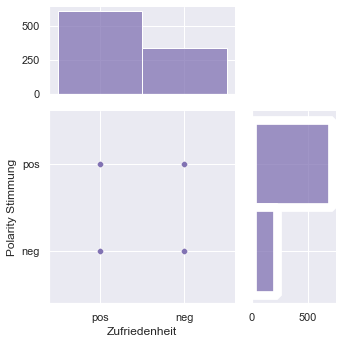

In [144]:
#%matplotlib inline
sns.set_theme(style="darkgrid")
g = sns.jointplot(data=df, x="Zufriedenheit", y="Polarity Stimmung", height=5, ratio=2, marginal_ticks=True, color="m")

<AxesSubplot:xlabel='Gesamt_zfh', ylabel='count'>

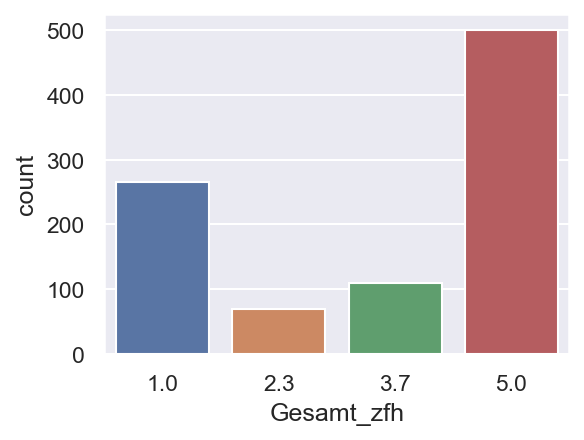

In [145]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(x="Gesamt_zfh",data=df)

<AxesSubplot:xlabel='count', ylabel='Klinik_Name'>

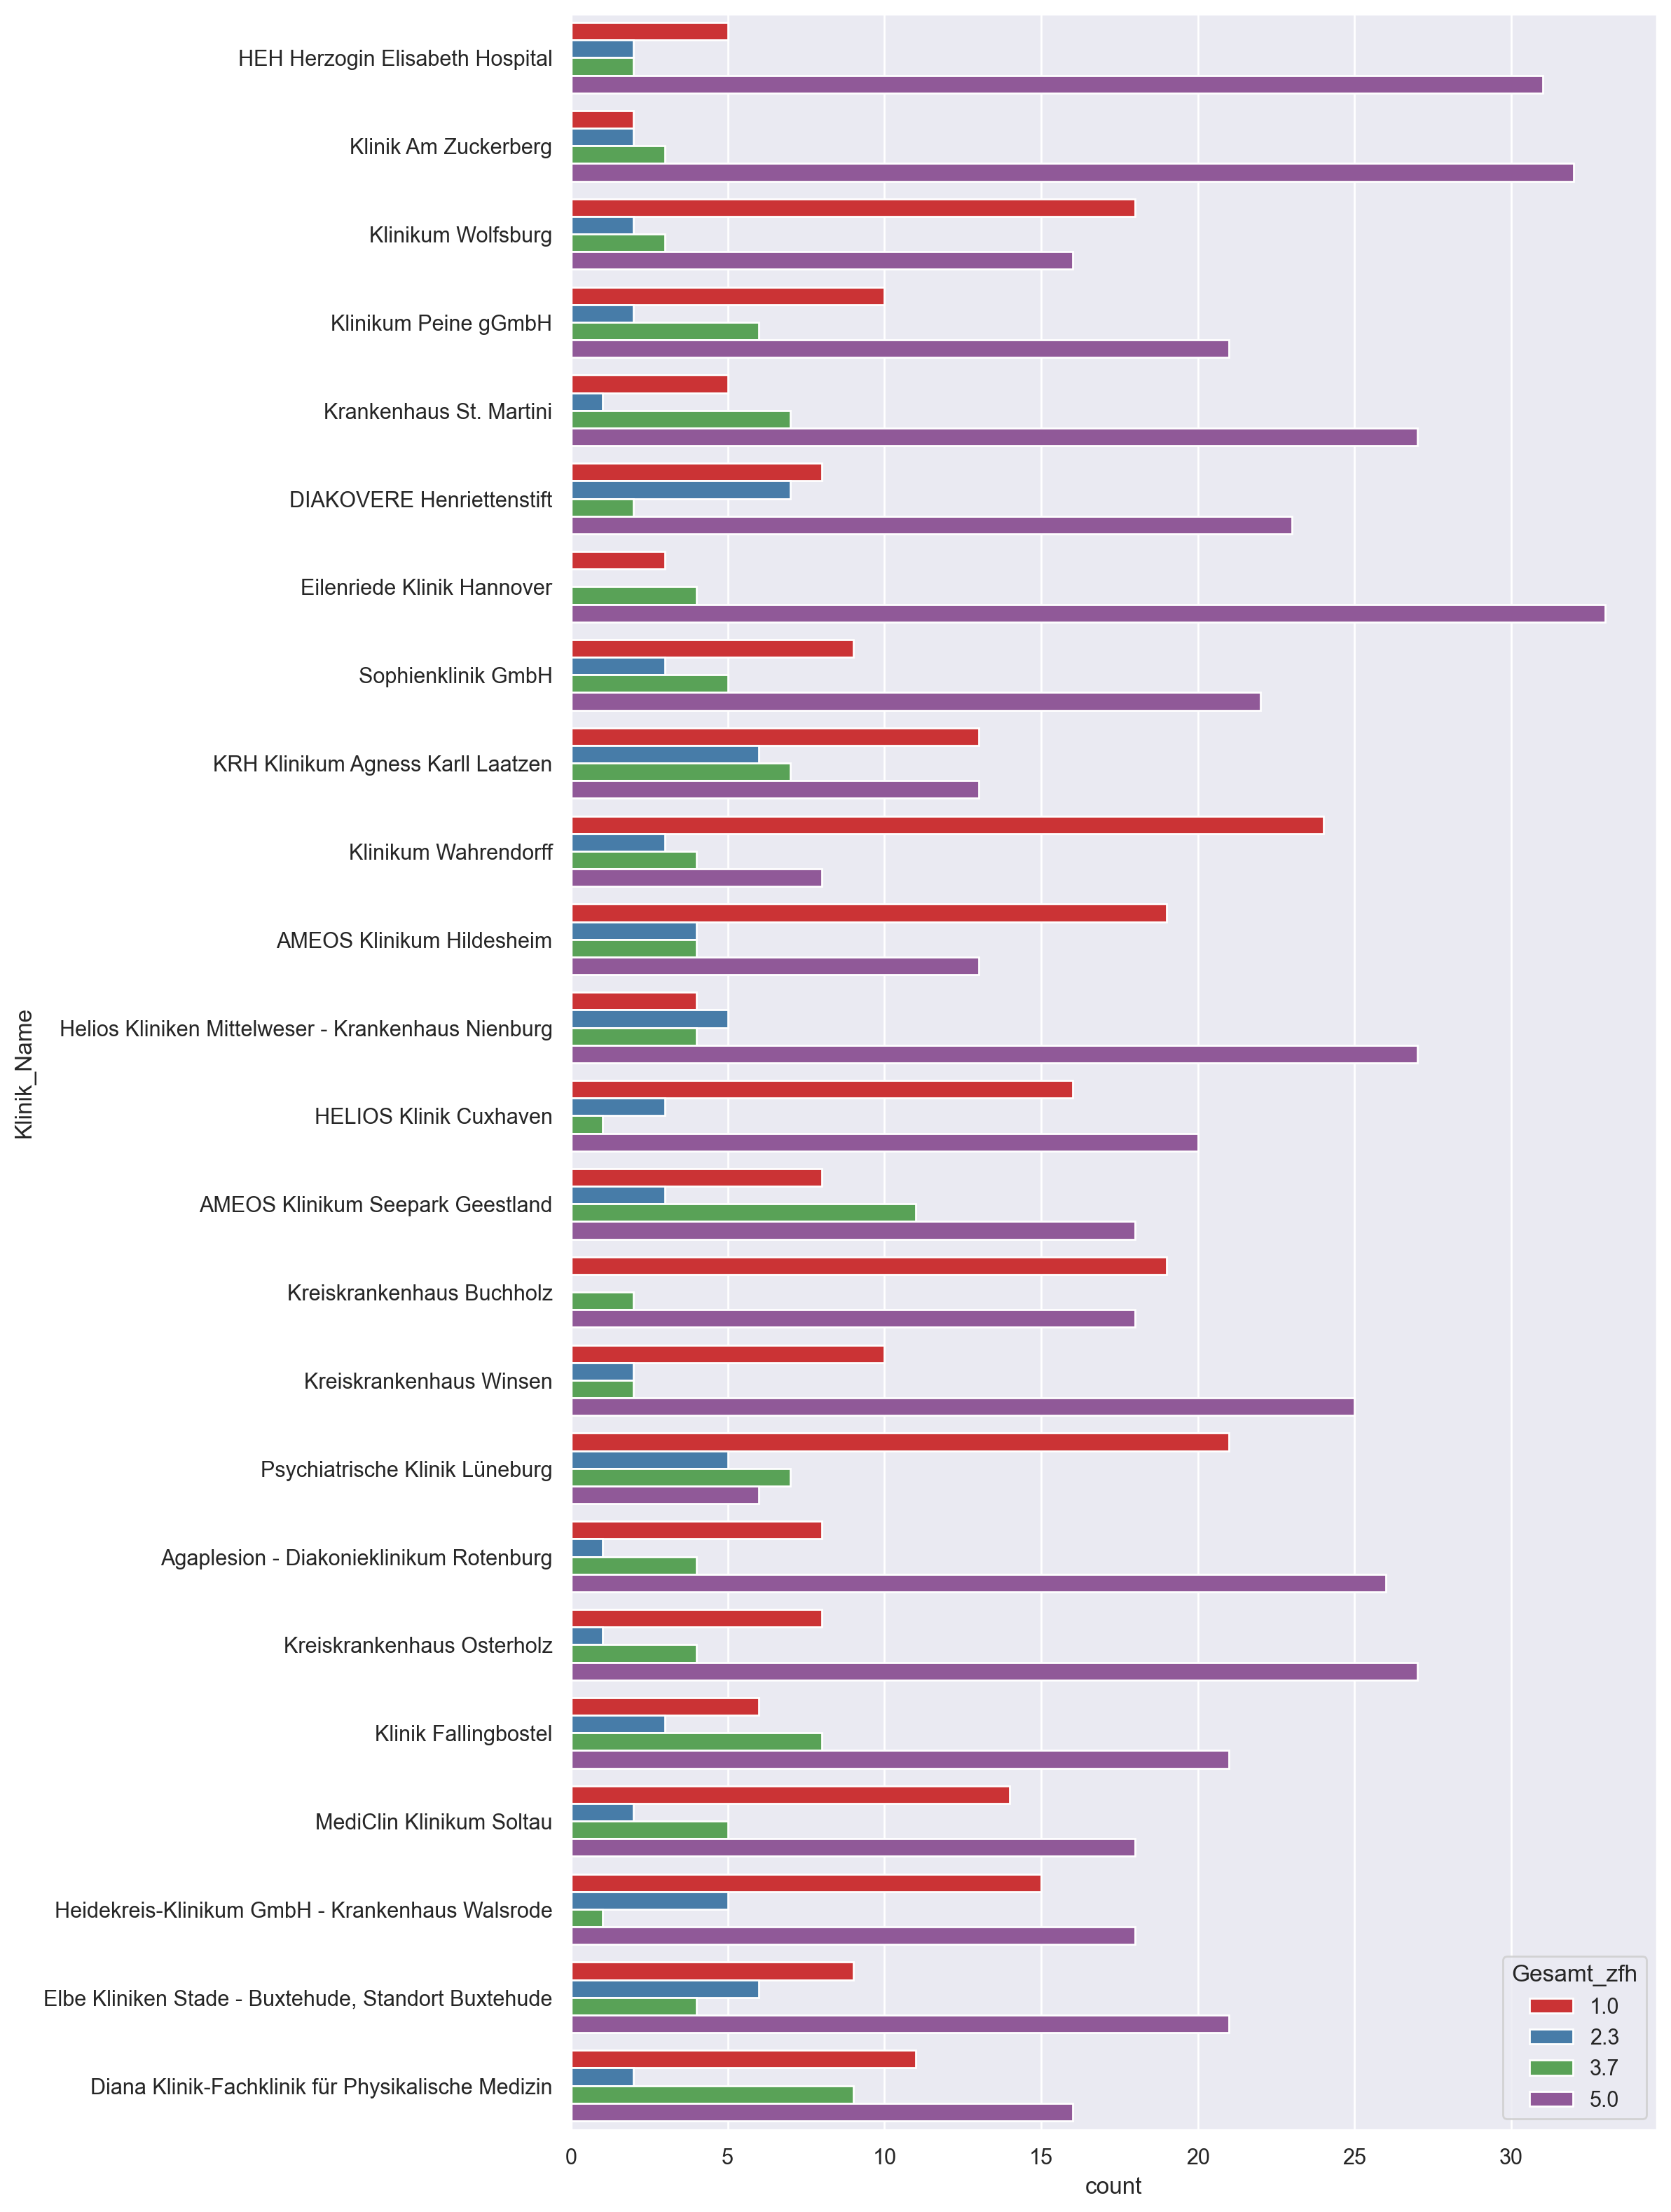

In [146]:
plt.figure(figsize=(10,20),dpi=200)
sns.countplot(y='Klinik_Name',data=df,hue='Gesamt_zfh', palette='Set1')

<h1 style="text-align:left;color:azure;background-color:blue"><br> ML - MODEL<br></h1>

In [ ]:
### Checking for the Distribution of Default ###

                                                                  Zufriedenheit
Klinik_Name                                        Zufriedenheit               
AMEOS Klinikum Hildesheim                          neg                    57.50
                                                   pos                    42.50
AMEOS Klinikum Seepark Geestland                   pos                    72.50
                                                   neg                    27.50
Agaplesion - Diakonieklinikum Rotenburg            pos                    76.92
                                                   neg                    23.08
DIAKOVERE Henriettenstift                          pos                    62.50
                                                   neg                    37.50
Diana Klinik-Fachklinik für Physikalische Medizin  pos                    65.79
                                                   neg                    34.21
Eilenriede Klinik Hannover              

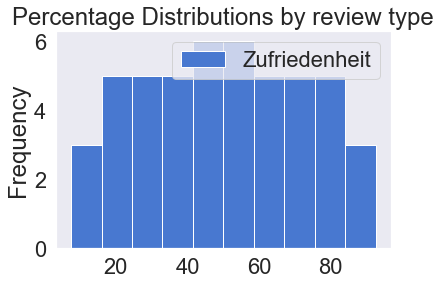

In [161]:
verteilung= df.groupby('Klinik_Name').Zufriedenheit.value_counts(normalize=True)*100
verteilung_df = verteilung.to_frame()
print(round(verteilung_df,2))
verteilung_df.plot(kind='hist')
plt.title('Percentage Distributions by review type')
plt.show()

c:\users\nowti\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


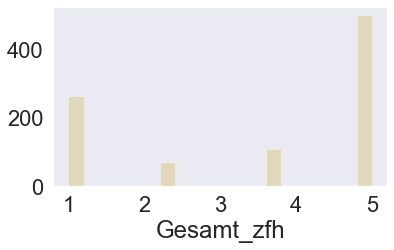

In [148]:
sns.set(style="dark",palette="muted",font_scale=2) #for backgraound and font
sns.distplot(df["Gesamt_zfh"],bins=20,kde=False,color="y")
plt.tight_layout()

In [149]:
verteilung_df.head()

Zufriedenheit
Klinik_Name                             Zufriedenheit               
AMEOS Klinikum Hildesheim               neg                57.500000
                                        pos                42.500000
AMEOS Klinikum Seepark Geestland        pos                72.500000
                                        neg                27.500000
Agaplesion - Diakonieklinikum Rotenburg pos                76.923077

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

Independent_var = df.Review
Dependent_var = df.Zufriedenheit

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.2, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 755
IV_test  : 189
DV_train : 755
DV_test  : 189


In [160]:
IV_train[6]

'Das gesamte Personal von der Notaufnahme über die Station 2, die Aufwachstation - alle sind sehr freundlich und zugewandt. Ebenso die Küche und das Reinigungspersonal. Ich habe mich sehr gut aufgehoben, behandelt und betreut gefühlt. Jeder achtet auf die Hygienevorschriften, es herrscht ein fröhlich-freundschaftlicher Ton und Umgang. Das wirkt sich auf die Patienten aus. Gerne weiter so ????????'

In [152]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [153]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[ 54,   5],
       [ 18, 112]], dtype=int64)

In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8783068783068783
Precision :  0.8925631981187537
Recall :  0.8783068783068783


In [165]:
example = ["Eine sehr slechte Klinik die mich wenig gutes gebracht hat. Die Klinik macht Werbung das sie spezialisiert sind in Psychosomatik und vorallem Depressionen, Burnout aber leider war davon wenig bis nichts zu merken währends meinen Aufenthalt Ende 2020. Die Therapeuten sind gerade aus dem Teenage-Alter heraus und sind ihre Aufgaben nicht gewachsen. Der seelische Schütt und Schmerz werden aufgewühlt und dann wird mann damit alleine gelassen ohne Hilfe. Die Psychologin war total überfördert mit ihre Aufgaben genau wie die Ergotherapeutin die gerne über ihre Lieblingsserie Gossip Girl geredet hat. Für die Nachsorge nach der Kur Aufenthalt soll mann sich alleine drum kummern. Der Ober-Arzt konnte kein Kritik ab und ist sehr schnell auf sein Schlipps getreten und die Organisation zwischen alle Abteilungen ist ein grosses Chaos. Der eine weiss nicht was der andere macht. Ein richtiger Schmerztherapeuten gibt es auch nicht. Die ganze Klinik ist auf Zugluft weil die ganze Zeit und überall geluftet wird wegen Corona also zieht euch dick an wenn im Fitnesssaal oder essen geht in den Speisesaal. Abhänglich von welcher Koch gerade am Herd steht schmeckt das Essen oder nicht. Die Klinik ist eine reine Abspeck-Anorexia-Klinik und alles ist darauf gerichtet Gewicht zu reduzieren oder zu zu nehmen mit seeliche Problematik sollte mann hier nicht hingehen ddas sind für mich keine Profi´s sondern Amateure. Alles gibt mir das Gefuehl mann sein nur eine Nummer und Hauptsache das Geld stimmt. Ich habe viele andere Patienten gesprochen und die wenigstens davon waren positiv. Ich werde dies bezüglich meine Rentenversicherung melden."]
result = model.predict(example)

print(result)

['neg']
